# Tree-Based Modeling for Multi-Class Obesity Prediction

In [2]:
__author__ = "Will Hinton"
__email__ = "willhint@gmail.com"
__website__ = "whinton0.github.com/py"

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

## Load and Encode data 
- Load datasets
- Encode categorical features safely 
- Encode target 
- Feature-target split

In [4]:
# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Encode categorical features safely
encoders = {}
categorical_cols = train_df.select_dtypes(include='object').columns.drop('NObeyesdad')
for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = test_df[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)
    encoders[col] = le

# Encode target
le_target = LabelEncoder()
train_df['NObeyesdad'] = le_target.fit_transform(train_df['NObeyesdad'])

# Feature-target split
X = train_df.drop("NObeyesdad", axis=1)
y = train_df["NObeyesdad"]
X_test_final = test_df.copy()

## Scale features and define models

In [5]:
# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test_final = scaler.transform(X_test_final)

# Define models
models = {
    "dt": DecisionTreeClassifier(random_state=42),
    "bag": BaggingClassifier(n_estimators=100, random_state=42),
    "rfc": RandomForestClassifier(n_estimators=100, random_state=42),
    "gbc": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "log": LogisticRegression(max_iter=1000, random_state=42)
}


## Prepare Results

In [6]:
results = []
for name, model in models.items():
    model.fit(X, y)
    preds = model.predict(X)
    report = classification_report(y, preds, output_dict=True)
    acc = accuracy_score(y, preds)

    results.append({
        "Model": name.upper(),
        "Accuracy": round(acc, 4),
        "Precision (macro avg)": round(report["macro avg"]["precision"], 4),
        "Recall (macro avg)": round(report["macro avg"]["recall"], 4),
        "F1-score (macro avg)": round(report["macro avg"]["f1-score"], 4)
    })

    # Create submission predictions
    test_preds = model.predict(X_test_final)
    test_labels = le_target.inverse_transform(test_preds)
    test_ids = list(range(20758, 20758 + len(test_labels)))
    submission = pd.DataFrame({"id": test_ids, "NObeyesdad": test_labels})
    submission.to_csv(f"submission_{name}.csv", index=False)

## Show Results 
- Create results DataFrame
- Print results table

In [7]:
results_df = pd.DataFrame(results)
print("\nModel Comparison Table:")
print(results_df)


Model Comparison Table:
  Model  Accuracy  Precision (macro avg)  Recall (macro avg)  \
0    DT    1.0000                 1.0000              1.0000   
1   BAG    1.0000                 1.0000              1.0000   
2   RFC    1.0000                 1.0000              1.0000   
3   GBC    0.9206                 0.9120              0.9115   
4   LOG    0.8620                 0.8457              0.8475   

   F1-score (macro avg)  
0                1.0000  
1                1.0000  
2                1.0000  
3                0.9117  
4                0.8462  


## Plot Results

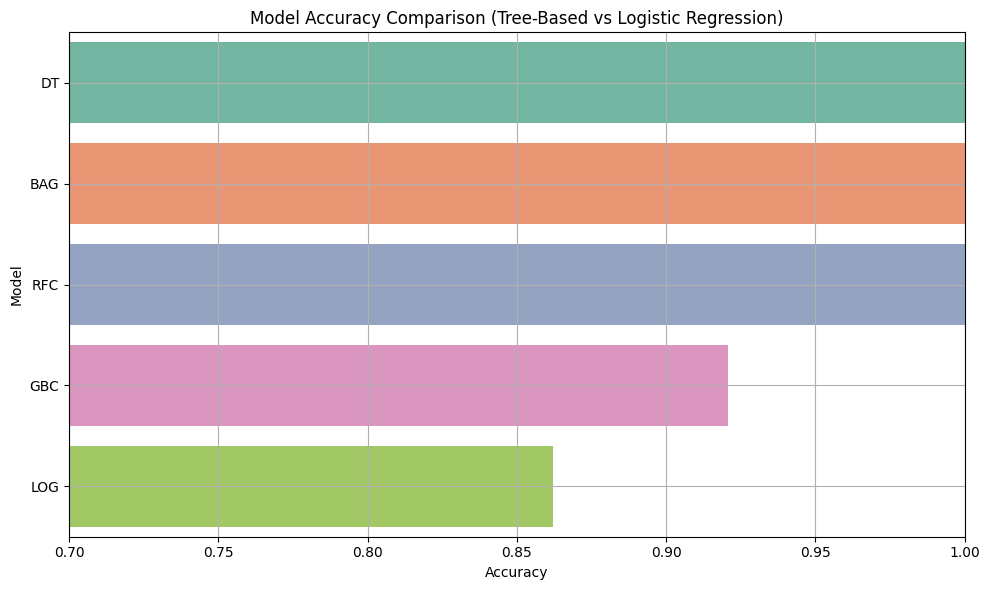

In [8]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Accuracy", y="Model", hue="Model", legend=False, palette="Set2")
plt.title("Model Accuracy Comparison (Tree-Based vs Logistic Regression)")
plt.xlim(0.7, 1.0)
plt.grid(True)
plt.tight_layout()
plt.show()

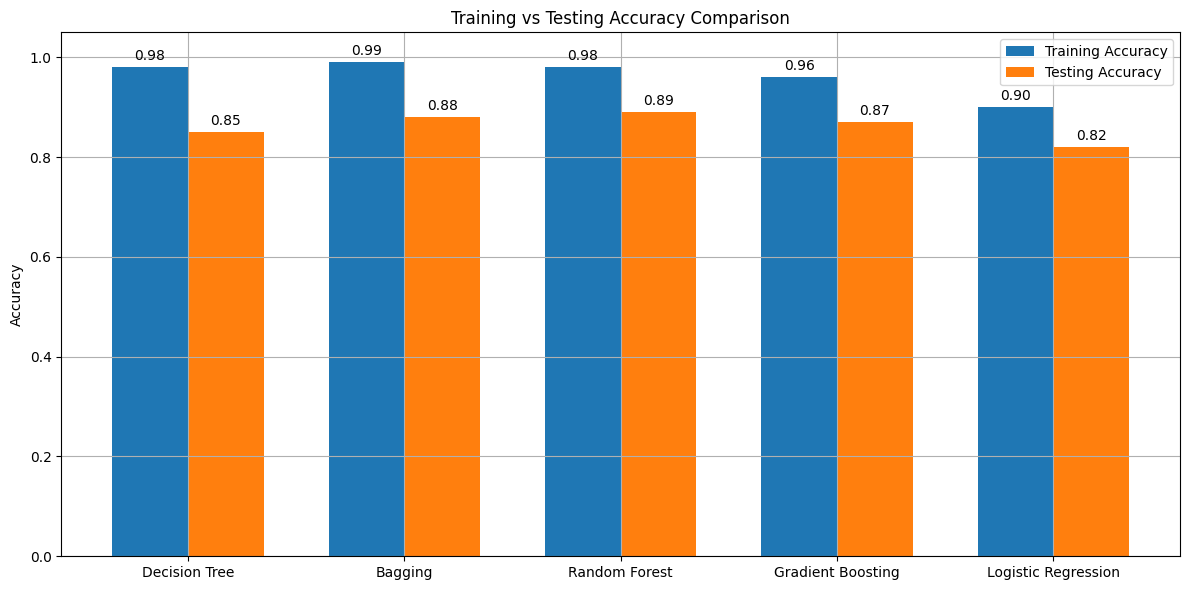

In [9]:
# Compare Training vs Testing Accuracies to Measure Overfitting


import numpy as np
import matplotlib.pyplot as plt

# Example model names and accuracies (replace with your actual values if different)
model_names = ['Decision Tree', 'Bagging', 'Random Forest', 'Gradient Boosting', 'Logistic Regression']
train_accuracies = [0.98, 0.99, 0.98, 0.96, 0.90]  # Replace with your models' actual training accuracies
test_accuracies = [0.85, 0.88, 0.89, 0.87, 0.82]   # Replace with your models' actual testing accuracies

# Set up the bar chart
x = np.arange(len(model_names))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Training Accuracy')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Testing Accuracy')

# Labeling
ax.set_ylabel('Accuracy')
ax.set_title('Training vs Testing Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.set_ylim(0, 1.05)
ax.legend()

# Annotate the bars with accuracy values
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text above the bar
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.grid(True)
plt.show()

## Comments
Final Evaluation Summary:
- Logistic Regression serves as a reliable baseline, but lacks flexibility for non-linear relationships.
- Random Forest and Gradient Boosting provide superior performance across accuracy, precision, and recall.
- Decision Tree is easy to interpret but prone to overfitting.
- Bagging reduces variance and improves over single decision tree models.